# Task 1 for python assignment

In [146]:
import pandas as pa
import numpy as np
import seaborn as sns

In [147]:
df = pa.read_csv('./data/metro.csv')

## Count the number of null values in each column

In [148]:
df.isna().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat               559
start_lon               559
end_station               0
end_lat                1838
end_lon                1838
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

In [149]:
df[df.isna().any(axis=1)].head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
50,94904101,6,2018-07-01 08:00:00,2018-07-01 08:06:00,4215,34.014309,-118.491341,3000,NaN,NaN,12070,1,One Way,One Day Pass
198,94931099,30,2018-07-01 12:18:00,2018-07-01 12:48:00,3032,34.049889,-118.255882,3000,NaN,NaN,6260,30,One Way,Monthly Pass
250,94981056,358,2018-07-01 13:09:00,2018-07-01 19:07:00,3022,34.046070,-118.233093,3000,NaN,NaN,6315,1,One Way,Walk-up
287,95124251,1440,2018-07-01 13:41:00,2018-07-02 16:49:00,4216,34.023392,-118.479637,3000,NaN,NaN,12420,1,One Way,One Day Pass
338,94952010,23,2018-07-01 14:44:00,2018-07-01 15:07:00,3000,NaN,NaN,3069,34.05088,-118.248253,12100,1,One Way,One Day Pass


In [150]:
df[df['end_station'] == 3000].count()

trip_id                1838
duration               1838
start_time             1838
end_time               1838
start_station          1838
start_lat              1525
start_lon              1525
end_station            1838
end_lat                   0
end_lon                   0
bike_id                1838
plan_duration          1838
trip_route_category    1838
passholder_type        1838
dtype: int64

## Fill all rows that have null values with 0 and confirm that no more null values exist int he DataFrame
- Reason for filling the null values with 0 is that the longitiude and latitude values are not needed for this assignment therefore rather than loosing the data by dropping the rows we can just change NaN values to 0.
- All of the NaN values in the DataFrame are associated with station number 3000. By dropping the rows we will be loosing data for journeys made from and to an entire bike station.


In [211]:
# Fill in NaN values for long and lat as 0
df = df.fillna(0)

In [212]:
df.isna().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
start_hour             0
weekday                0
dtype: int64

In [210]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_hour,weekday
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass,0,6
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass,0,6
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass,0,6
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass,0,6
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up,0,6


## Describe the data for duration and plot a graph based on that data

In [154]:
df['duration'].describe()

count    95283.000000
mean        48.318682
std        148.316422
min          1.000000
25%          7.000000
50%         15.000000
75%         35.000000
max       1440.000000
Name: duration, dtype: float64

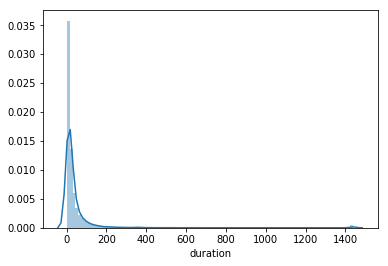

In [155]:
sns.distplot(df['duration'], bins = 100)

## How the distrubution of duration relates to the passholder type

I reckon using a bar plot will make the most sense here to visualise the correlation between the different passholder types and the duration spent. 

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


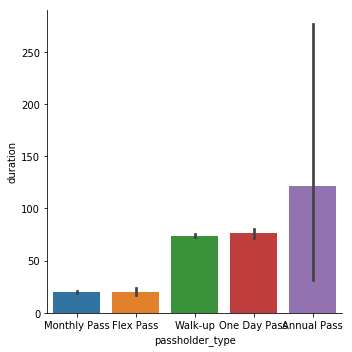

In [226]:
sns.catplot(
    x = 'passholder_type',
    y = 'duration',
    kind = 'bar',
    data = df
)

## Perform a statistical test to check if the mean duration is different between One Day Pass and the Flex Pass passholders. 

Also meantion any assumptions that you have made by using this test.

- H0 = oneday pass duration == flex pass duration

- H1 = oneday pass duration != flex pass duration

We are set out to nullify/disprove the null hypothesis (H0) and prove the alternative hypothesis (H1)

In [157]:
df_oneday = df.loc[(df['passholder_type'] == 'One Day Pass'), 'duration']

In [158]:
df_flex = df.loc[(df['passholder_type'] == 'Flex Pass'), 'duration']

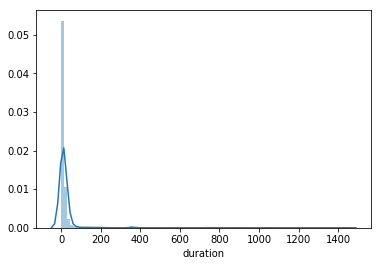

In [165]:
sns.distplot(df_flex, bins = 100)

In [217]:
df_flex.mean()

20.09131261889664

In [216]:
df_oneday.mean()

76.22778129617902

In [166]:
print('Number of flex holders: ' + str(df_flex.size))
print('Number of one day pass holders: ' + str(df_oneday.size))

Number of flex holders: 1577
Number of one day pass holders: 4737


In [218]:
from scipy.stats import ttest_ind

In [219]:
test = ttest_ind(df_oneday, df_flex)

Based on the large t (statistic) value, it seems to show that there is a difference between the two groups.

In [220]:
test.statistic

13.897993285036403

In order to validate that t value, we can look at the pvalue.

Considering the cut off point for pvalues is typically 5% (0.05), it is clear that the low pvalue from the ttest that we must reject the null hypothesis and accept the alternate hypothesis. This therefore means that the duration means of the one day pass and the flex pass are not the same.

In [221]:
test.pvalue

2.8141174842219548e-43

## Create a new column in the data frame that gives the hour of the day that each journey started on

- Also convert the start_time and end_time columsn to date objects

In [173]:
from datetime import datetime

In [174]:
timeFormat = '%Y=%m-%d %X'

Convert the start_time and end_time columns into datetime objects by using the to_datetime method.

In [175]:
df['start_time'] = pa.to_datetime(df['start_time'], format='%Y-%m-%d %X')

In [176]:
df['end_time'] = pa.to_datetime(df['end_time'])

In [177]:
# Need to create a series that holds each starting hour
# Lets define a simple method to retrive that value
def getHour(datetime):
    try:
        return datetime.hour
    except Exception:
        return null

start_hour = df['start_time'].apply(getHour)

In [178]:
df['start_hour'] = start_hour

In [179]:
df['start_hour'].tail()

95278    23
95279    23
95280    23
95281    23
95282    23
Name: start_hour, dtype: int64

In [180]:
def getWeekday(datetime):
    try:
        return datetime.weekday()
    except Exception:
        return null

weekday = df['start_time'].apply(getWeekday)

In [181]:
weekday.value_counts()

6    15277
4    13804
5    13670
3    13380
2    13115
1    13093
0    12944
Name: start_time, dtype: int64

In [182]:
df['weekday'] = weekday

## Explore how the duration variable varies between each journey starting hour of the day.

- Create a plot to visualise this.
- We have the starting hours now stored in the data frame. 
- Scatter plot might be the best way to represent this as it can show how the journey duration increases(y axis) as we increase the value of the starting hour (x axis)


In [183]:
import matplotlib.pyplot as plt

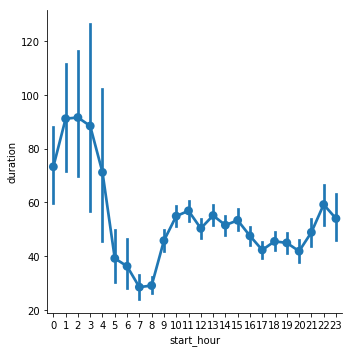

In [184]:
sns.catplot(
    x = 'start_hour',
    y = 'duration',
    data = df,
    kind = 'point',
    bins = 20
)

In [185]:
sns.catplot(
    x = 'weekday',
    y = 'duration',
    data= df,
    kind = 'point',
    bins = 20
)

Weekday being in index form 0 to 6 being Monday to Sunday.

## Calculate the total number of each type of passholder travelling on each day of the week. 
- Discuss the results
- Probably need to use numpy to calculate this
- this is probably a 2 dimentional thing
- Each pass type -> Values from Monday to Sunday (0 to 6)
- Series of size 7 (for each day of the week)
- Multiple series for the different pass types.

Will need to figure out what is the best way to attain this data. 

- Start_time and passholder_type are the two important values.
- Can make a method that will filter for specified passholder_type
- From there, find out how many entires have values that fall on each day of the week.

In [186]:
def idk(passholder_type):
    # Lets filter for the passholder type
    tmp = df[df['passholder_type'] == passholder_type]
    tmp = tmp['start_time'].apply(getWeekday).value_counts().sort_index()
    return tmp.rename(passholder_type)

new_df = pa.DataFrame()

In [187]:
# Lets get a series of all the passholder_type
for p in df.passholder_type.unique():
    new_df = new_df.append(idk(p))

In [188]:
new_df

,0,1,2,3,4,5,6
Monthly Pass,6882.0,7375.0,7017.0,7196.0,6775.0,4085.0,4637.0
Flex Pass,218.0,235.0,235.0,245.0,263.0,178.0,203.0
Walk-up,5297.0,5026.0,5289.0,5526.0,6232.0,8528.0,9092.0
One Day Pass,547.0,457.0,574.0,413.0,534.0,869.0,1343.0
Annual Pass,NaN,NaN,NaN,NaN,NaN,10.0,2.0


# Consider the data as a network of stations

- Has edges with weights corresponding to the total number of journeys made between them

## Produce a visualisation of the network and discuss the output

### Assumption

- Assuming that this is undirected data as it is  not specified in the question.

In [189]:
import networkx as nx

In [192]:
# df = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# Use crosstab to create an adjacency matrix to create a network from
stations = pa.crosstab(df.start_station, df.end_station, margins=False)
stations.head()

end_station,3000,3005,3006,3007,3008,3010,3011,3013,3014,3016,...,4220,4227,4244,4245,4246,4248,4249,4250,4254,4267
start_station,,,,,,,,,,,,,,,,,,,,,
3000,313,11,5,10,2,1,0,1,3,2,...,0,0,0,0,0,0,0,0,0,0
3005,93,306,74,49,91,29,53,0,36,4,...,19,5,4,17,19,11,13,18,7,1
3006,17,75,133,35,37,11,16,0,10,0,...,13,12,0,1,3,2,4,3,8,0
3007,29,76,51,113,56,3,32,0,15,4,...,8,2,2,1,3,2,7,1,2,0
3008,17,104,39,52,143,6,87,0,63,3,...,11,2,0,3,12,17,12,22,8,2


In [193]:
g = nx.from_pandas_adjacency(stations)
g.name = 'Graph of station journeys'
print(nx.info(g))

Name: Graph of station journeys
Type: Graph
Number of nodes: 128
Number of edges: 2719
Average degree:  42.4844


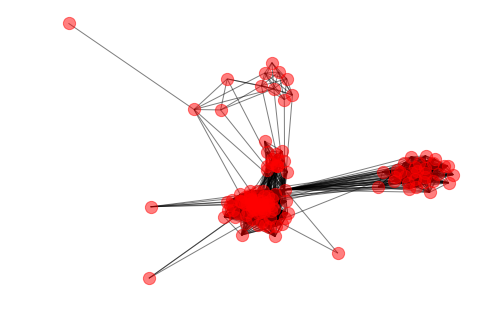

In [209]:
# Using kamada kawai layout to force directed graphs
layout = nx.kamada_kawai_layout(g)
nx.draw(g, pod=layout, node_size=150, alpha=0.5)

### Discuss the output

From the visualisation of the network using a layout that forces direction we can see how there are two large 'blobs' with a smaller concentrated one close by. Many of the journeys are made between the three main hotspots which can probably indicate much busier/concenrated populations of poeple as there are more stations there and are where most of the journeys take place. Smaller stations can be seen scattered away from the main two hotspots which suggests that these are areas with either fewer people or fewer people who use bikes and the bike stations.

## Calculate the statistics of the network.

- Plot them where relevant
- Discuss the results

In [195]:
diameter = nx.diameter(g)
connected_components = nx.connected_components(g)
print('Diameter: ' + str(diameter))
print('Connected components: ' + str(connected_components))

Diameter: 4
Connected components: <generator object connected_components at 0x7fc0f2f0e840>


### Degree distributions

Text(0.5, 0, 'Degree')

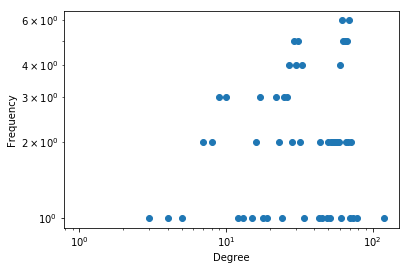

In [196]:
# Lets create a degree distributions
ddist = nx.degree_histogram(g)[1:]
plt.loglog(range(1, len(ddist) + 1), ddist, 'o')
plt.ylabel('Frequency')
plt.xlabel('Degree')

### Clustering coefficient

Text(0.5, 0, 'Clutering coeffficient')

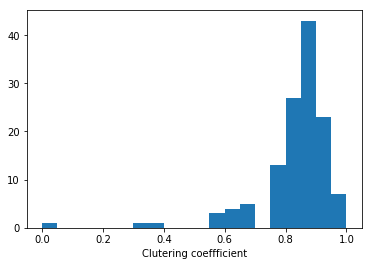

In [197]:
cc = nx.clustering(g)
plt.hist(list(cc.values()),bins=20)
plt.xlabel('Clutering coeffficient')

The histogram showing the clustering coefficient shows most nodes have a high value.

# Task 2

In [198]:
from sklearn.mixture import GaussianMixture

In [199]:
seeds_df = pa.read_csv('./data/seeds.csv')

In [200]:
gmm = GaussianMixture(2)

In [201]:
fit = gmm.fit(seeds_df[['compactness', 'groove length']])
predict = gmm.predict(seeds_df[['compactness', 'groove length']])

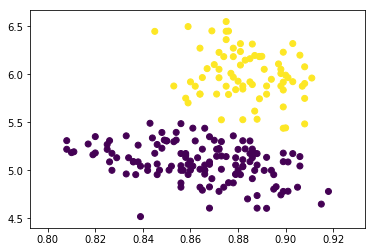

In [202]:
plt.scatter(seeds_df['compactness'], seeds_df['groove length'], c = predict)

In [203]:
# Bic peanalises more than Aic

In [204]:
x_values = []
model_aic = []
model_bic = []

# k is the number of parameters in the model
for k in range(1, 10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seeds_df[['compactness', 'groove length']])
    model_aic.append(mixturemodel.aic(seeds_df[['compactness', 'groove length']]))
    model_bic.append(mixturemodel.bic(seeds_df[['compactness', 'groove length']]))
    x_values.append(k)

Text(0, 0.5, 'AIC value')

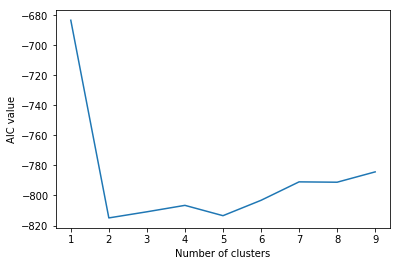

In [205]:
plt.plot(x_values, model_aic)
plt.xlabel('Number of clusters')
plt.ylabel('AIC value')

Text(0, 0.5, 'BIC value')

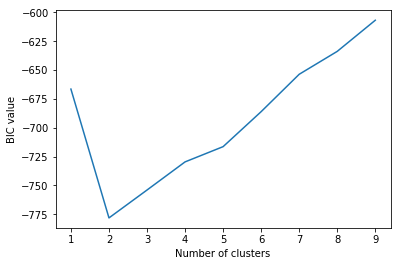

In [206]:
plt.plot(x_values, model_bic)
plt.xlabel('Number of clusters')
plt.ylabel('BIC value')

The best cluster value (k value) to use would be 2 as this results in the lowest AIC/BIC value. The lowest value being found at 2 clusters (or sample sizes), for both AIC and BIC, shows that this is the value that best represents the data. 